In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

In [3]:
m4_pcc_unique_line = [0.692, 0.742, 0.700, 0.780, 0.750]
m4_pcc_unique_env = [0.411, 0.490, 0.475, 0.389, 0.509]
m3_pcc_unique_line = [0.697, 0.759, 0.690, 0.740, 0.677]
m3_pcc_unique_env = [0.359, 0.382, 0.470, 0.353, 0.452]
m5_pcc_unique_line = [0.698, 0.756, 0.731, 0.761, 0.761]
m5_pcc_unique_env = [0.439, 0.481, 0.467, 0.471, 0.480]

In [4]:
df = pd.DataFrame({
    'Folds': list(range(1, 6)) * 2,
    'pcc_unique_line': m4_pcc_unique_line + m3_pcc_unique_line,
    'ML model': ['F2'] * 5 + ['F1M3'] *5,
    'pcc_unique_env': m4_pcc_unique_env + m3_pcc_unique_env,
    'm5_pcc_unique_line': m5_pcc_unique_line + m4_pcc_unique_line,
    'm5_pcc_unique_env': m5_pcc_unique_env + m4_pcc_unique_env,
    'm5 ML model': ['F3'] * 5 + ['F2'] *5,
    
    
})

In [5]:
def plot_pcc_bar(data,x, y, hue, xlabel, ylabel, legend, figure_path):
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df, x=x, y=y, hue=hue)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend(title=legend, fontsize=16)
    ax.set_ylim((0,1))
   
    for container in ax.containers:
        ax.bar_label(container,fontsize=14)
   
    fig = ax.get_figure()
    fig.savefig(figure_path, dpi=600, bbox_inches='tight')

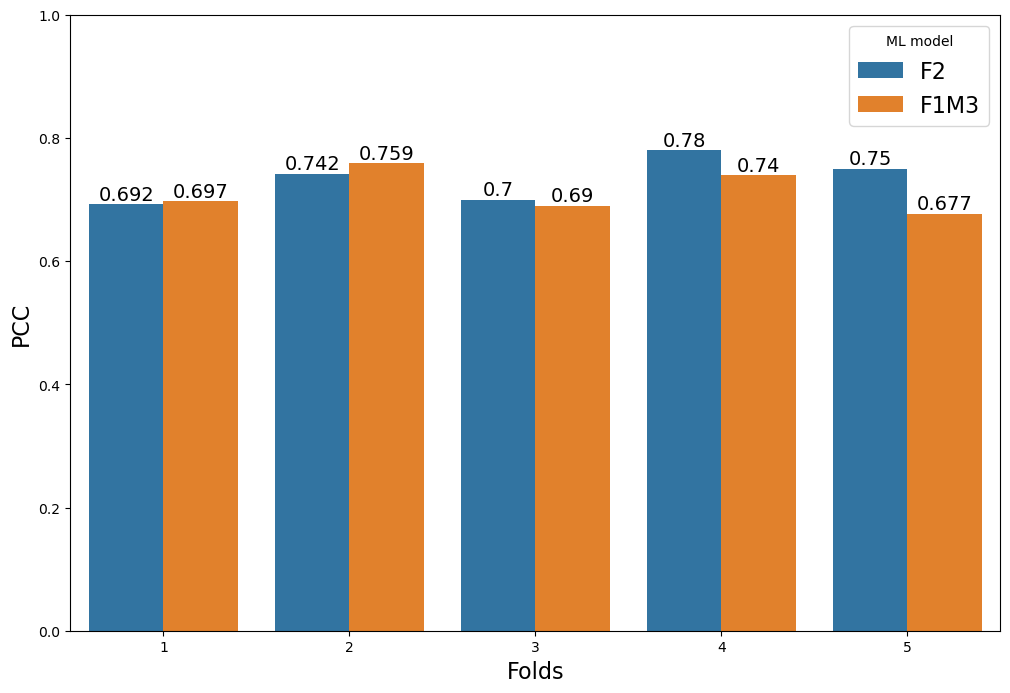

In [6]:
plot_pcc_bar(df, 'Folds', 'pcc_unique_line', hue='ML model', xlabel='Folds', ylabel='PCC', legend='ML model', figure_path='../figures/m4vsm3_unique_line.jpeg')

In [7]:
stat, pval = ttest_ind(m3_pcc_unique_line, m4_pcc_unique_line)
print('pval: ', pval)

pval:  0.3988094492306159


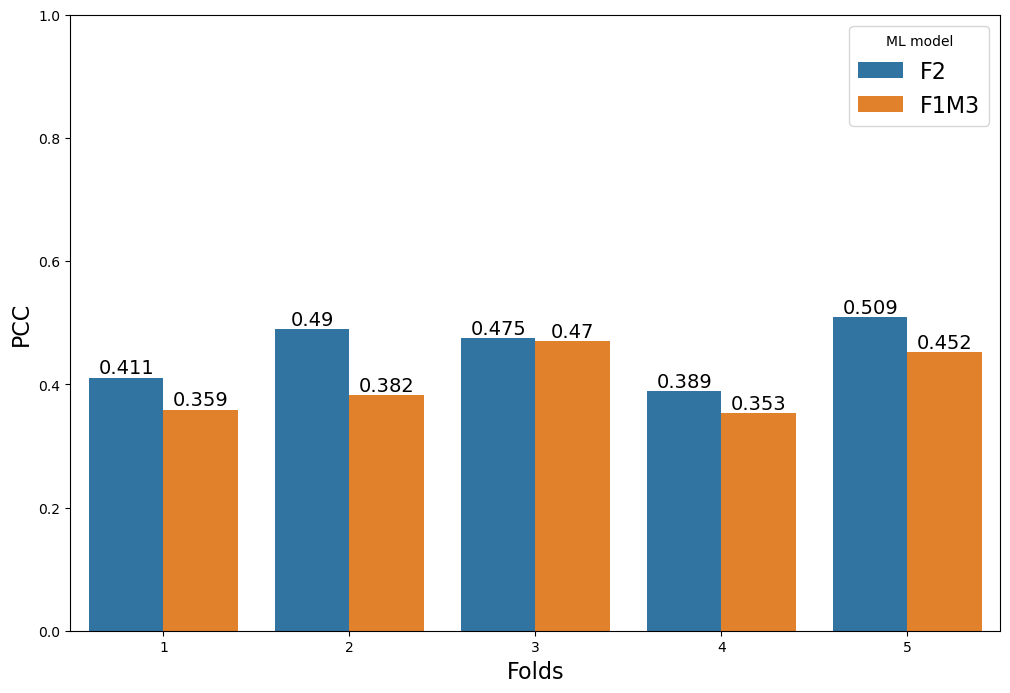

In [8]:
plot_pcc_bar(df, 'Folds', 'pcc_unique_env', hue='ML model', xlabel='Folds', ylabel='PCC', legend='ML model', figure_path='../figures/m4vsm3_unique_env.jpeg')

In [9]:
stat, pval = ttest_ind(m3_pcc_unique_env, m4_pcc_unique_env)
print('pval: ', pval)

pval:  0.1633265042451223


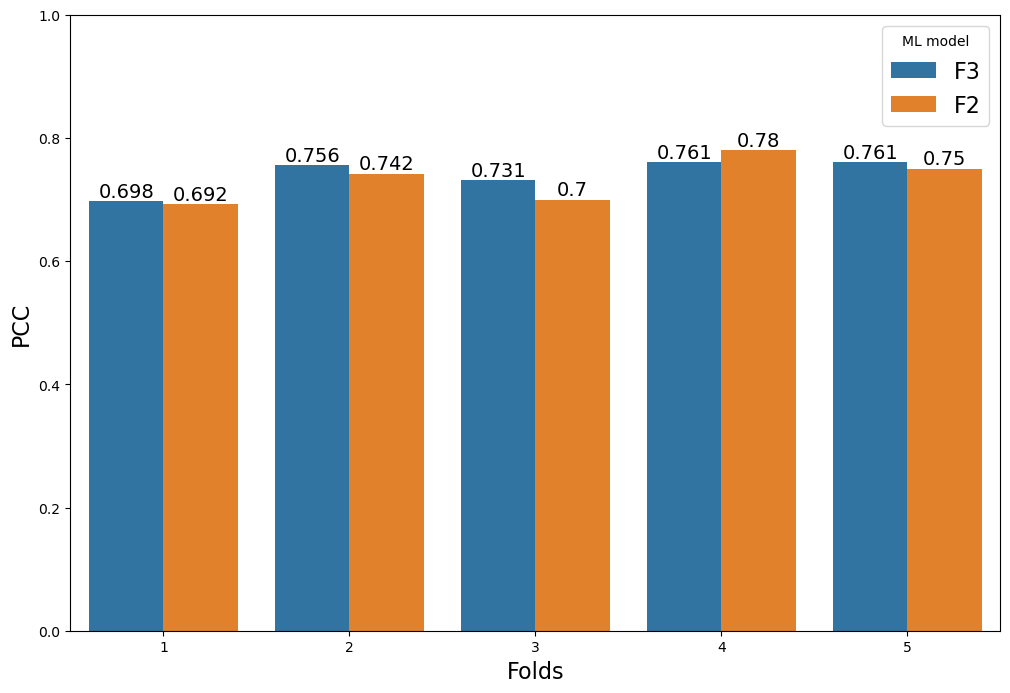

In [10]:
plot_pcc_bar(df, 'Folds', 'm5_pcc_unique_line', hue='m5 ML model', xlabel='Folds', ylabel='PCC', legend='ML model', figure_path='../figures/m5vsm4_unique_line.jpeg')

In [11]:
np.average(m5_pcc_unique_env)

0.4676

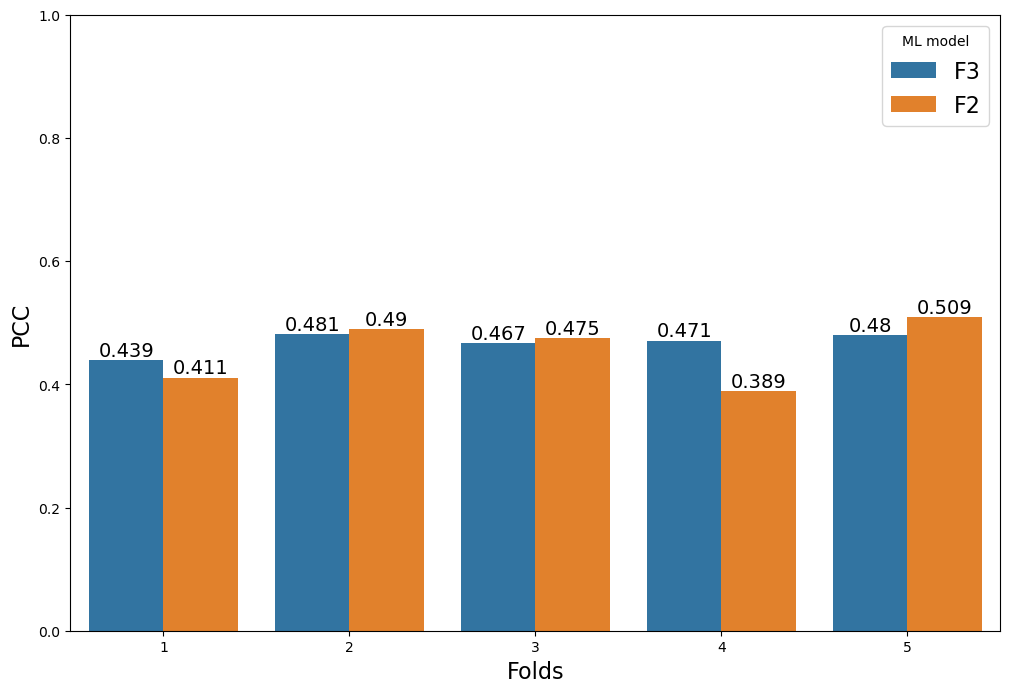

In [12]:
plot_pcc_bar(df, 'Folds', 'm5_pcc_unique_env', hue='m5 ML model', xlabel='Folds', ylabel='PCC', legend='ML model', figure_path='../figures/m5vsm4_unique_env.jpeg')